# 07b - Newton's Method Example Exercise

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = lambda x: x**2 -5

In [3]:
x = np.linspace(-10,10,100)

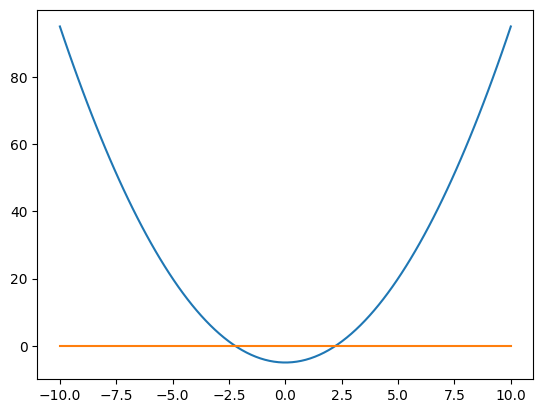

In [4]:
plt.plot(x, f(x))
plt.plot(x,np.zeros(len(x)))
plt.show()

We need to find the roots of the above equation.

## Newtons Method
_____

Taylor Series
$$
f(x) = f(x_o) + f'(x_o)⋅(x-x_o) + 1/2!⋅f''(x_o)(x-x_o)^2 + ...
$$

With just the first two terms, we want to find x where f(x) = 0:
$$
0 = f(x_0) + f'(x_o)⋅(x-x_0)
$$


Rearranging:
$$
x = x_0 -f(x_0)/f'(x_0)
$$

By doing so, in theory we should get closer to the actual point where f(x) = 0. We can repeat this process until we get close enough to the actual root.

In [5]:
def newton(x):
   fprime = 2*x
   return x - f(x)/fprime

In [6]:
newton(-10)

-5.25

In [7]:
newton(-5.25)

-3.1011904761904763

In [8]:
newton(-3.101)

-2.356691551112544

In [9]:
newton(-2.357)

-2.2391703436571913

In [10]:
newton(-2.239)

-2.2360698972755695

In [11]:
newton(-2.236)

-2.236067978533095

In [12]:
np.sqrt(5)

2.23606797749979

Lets plot our progression from our initial guess of $x_0=-10$

In [13]:
#first make an array of our point progression
xvals = np.array([-10,-5.25,-3.101,-2.357,-2.239,-2.236]) #convert list to array
yvals = f(xvals)

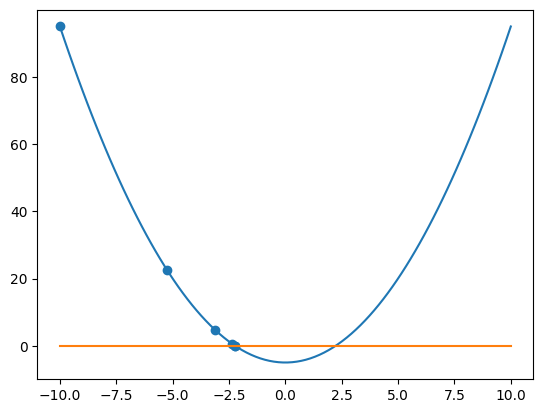

In [14]:
plt.plot(x, f(x))
plt.plot(x,np.zeros(len(x)))
plt.scatter(xvals,yvals)
plt.show()

Now lets try a more complex equation (still everywhere differentiable)

In [15]:
f2 = lambda x: x**5 - 5*x**4 + x**3 + x**2 + x + 190

(-100.0, 300.0)

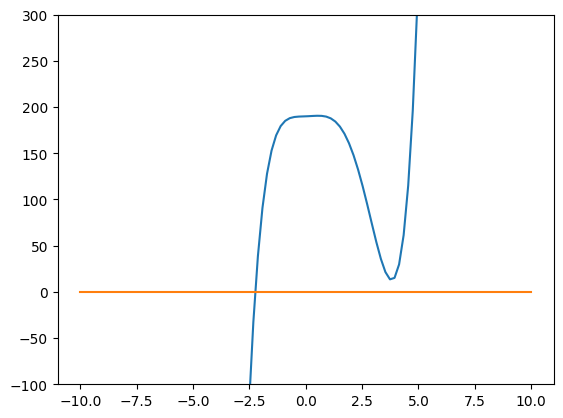

In [16]:
plt.plot(x,f2(x))
plt.plot(x,np.zeros(len(x)))
plt.ylim(-100,300)

In [17]:
#define our new newton's method with the derivative
def newton2(x):
  fprime = 5*x**4 - 20*x**3 + 3*x**2 + 2*x + 1
  return x - f2(x)/fprime

In [18]:
#Our initial guess
newton2(5.5)

4.870887130362349

In [19]:
newton2(4.870887)

4.424011563368115

In [20]:
newton2(4.424011)

4.106934926714884

In [21]:
newton2(4.1069349)

3.836682141049953

In [22]:
newton2(3.83668)

1.9062611179657791

Let's plot our points again:

In [23]:
xvals = np.array([5.5,4.87,4.42,4.106,3.83,1.906])
yvals = f2(xvals)

(-100.0, 300.0)

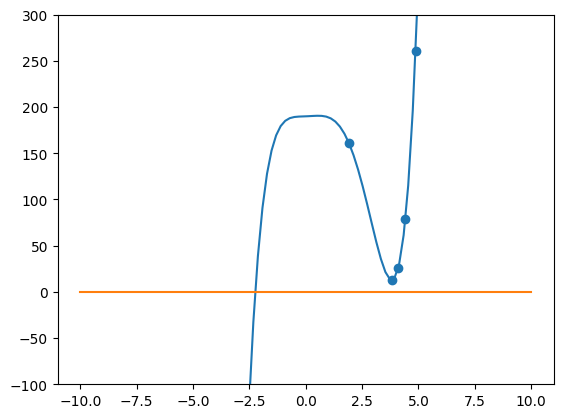

In [24]:
plt.plot(x,f2(x))
plt.plot(x,np.zeros(len(x)))
plt.scatter(xvals,yvals)
plt.ylim(-100,300)

You can see that a proper guess value is important in finding the root with derivative based root finding methods.

Instead of x's and y's, lets us an application example: the Colbrook equation.

In [25]:
Re = 5000
epsil = 0.0004
D = 0.001
def Colbrook(f):
    return 1/np.sqrt(f) + 2*np.log10(2.51/(Re*np.sqrt(f))+epsil/(3.71*D))

(-10.0, 10.0)

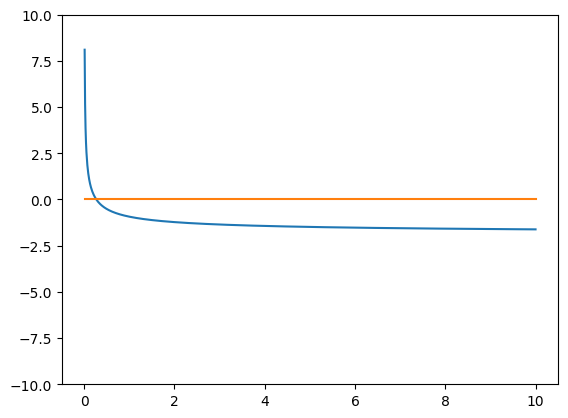

In [26]:
#now lets plot the function
xs = np.linspace(0.01,10,1000)
plt.plot(xs,Colbrook(xs))
plt.plot(xs,np.zeros(len(xs)))
plt.ylim(-10,10)

Now lets setup our Newton's method to find the friction factor at those conditions.

In [27]:
def Colbrook_prime(f):
    return -1/(2*f**(3/2)) - 2.51/(np.log(10)*Re*f**(3/2)*(0.2695*epsil/D+2.51/(Re*np.sqrt(f))))

In [29]:
newt(10)

4.906781692574499

In [30]:
newt(4.906)

3.3027818875374457

In [31]:
newt(3.30)

2.4749011423861025

In [32]:
newt(2.47)

1.969012797369205

In [33]:
newt(1.96)

1.627270836441956

In [34]:
newt(1.62)

1.3846968179858952

In [35]:
newt(1.38)

1.2056306129913872

In [36]:
newt(1.20)

1.0667077024540468

Isn't there a better way of doing this than having to type this in over and over. Let's modify the Newton function to do the interation for us.

In [37]:
def Newton(x):
  for i in range(0,300):
    fprime = Colbrook_prime(x)
    xnew = x - Colbrook(x)/fprime*0.05
    x = xnew
    print(x)
  return xnew

In [38]:
Newton(1.1)

0.9877000746858369
0.8973280130671422
0.8232745276173374
0.7616664915245736
0.7097481334254546
0.6655083384581282
0.6274471654780056
0.5944246062189653
0.5655597564278563
0.5401618885977597
0.51768228188706
0.4976798930065428
0.4797964594496145
0.4637381571405189
0.44926189328784516
0.4361649297062868
0.4242769339980847
0.41345382417017645
0.40357295422901684
0.39452931372622924
0.38623250195450304
0.37860429967689824
0.37157670590170827
0.365090339616655
0.3590931301746058
0.3535392376491302
0.3483881576671783
0.34360397518232494
0.3391547392303269
0.33501193652229105
0.33115004622348415
0.3275461617620675
0.32417966825083316
0.32103196626390434
0.3180862344222667
0.31532722460714513
0.3127410847147391
0.3103152047478407
0.3080380827541228
0.3058992077020092
0.3038889568599593
0.3019985056347888
0.300219748145879
0.2985452270779009
0.2969680715754017
0.29548194212657153
0.2940809815373829
0.29275977122642904
0.29151329217950767
0.2903368899948145
0.28922624352739057
0.2881773367075394

0.2693365410392384

In [39]:
#check if near zero
Colbrook(0.2693365410392384)

-1.9168028964067219e-07

In [49]:
def Newton(x):
  fprime = Colbrook_prime(x)
  xnew = x - Colbrook(x)/fprime*0.05
  while abs(xnew - x)>1e-6:
    x = xnew
    fprime = Colbrook_prime(x)
    xnew = x - Colbrook(x)/fprime*0.05
  return xnew

In [50]:
Newton(10)

0.26935482904957475

Check answer against fsolve

In [40]:
from scipy.optimize import fsolve

In [41]:
fsolve(Colbrook,0.3)

array([0.26933649])